In [84]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from preprocessing import load_file_data, filter_eeg_data, epoch_data
from dataset import EEGDataset
from snn import SNN, SpikingModel, train_model, test_model

# Look Left Data Preparation

Creating RawArray with float64 data, n_channels=8, n_times=14237
    Range : 0 ... 14236 =      0.000 ...    56.944 secs
Ready.


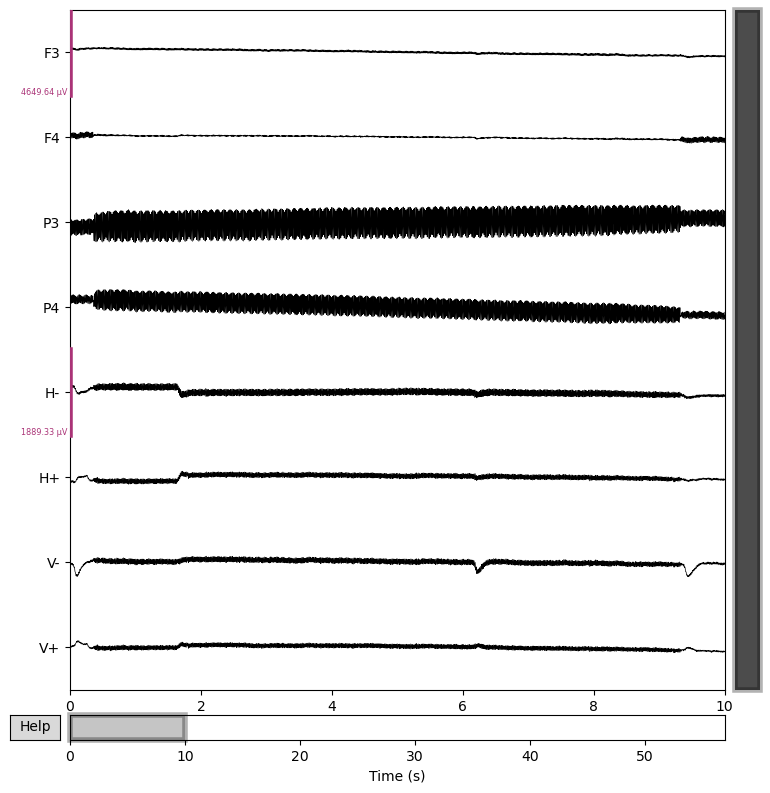

In [85]:
filenames = ["data/OpenBCISession_left_1/BrainFlow*.csv", 
             "data/OpenBCISession_left_2/BrainFlow*.csv", 
             "data/OpenBCISession_left_3/BrainFlow*.csv",
             "data/OpenBCISession_left_4/BrainFlow*.csv",
             "data/OpenBCISession_left_5/BrainFlow*.csv"]

raw_left = load_file_data(filenames)
raw_left.plot(n_channels=8, scalings='auto');

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


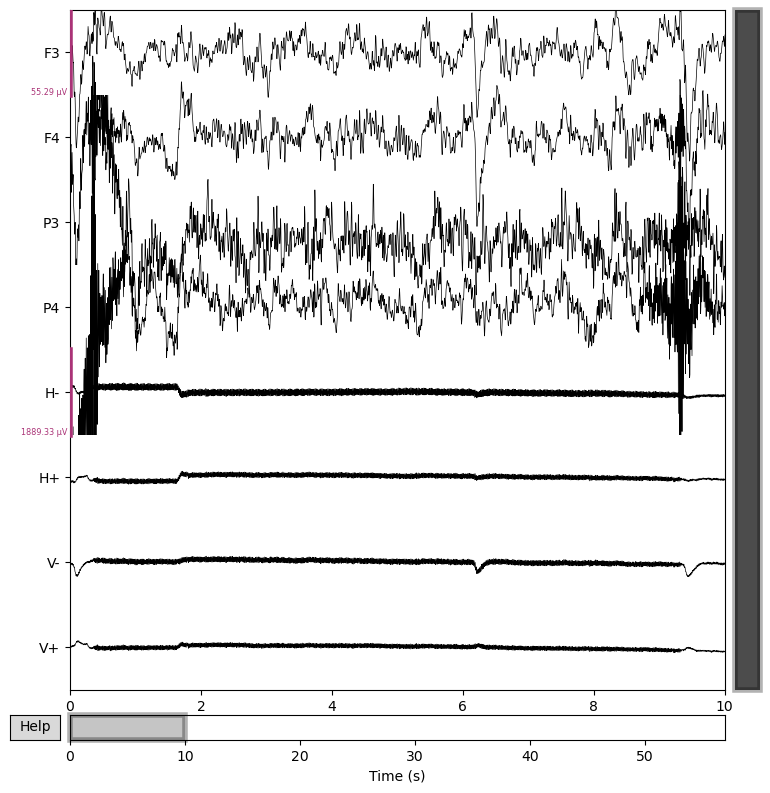

In [86]:
# Apply notch filter to remove 60Hz noise
filtered = filter_eeg_data(raw_left)
filtered.plot(n_channels=8, scalings='auto');

In [87]:
# Epoch data into 0.5 second windows
epochs = epoch_data(filtered, time_window=0.5, overlap=0)
print(epochs.get_data().shape)
print(epochs.get_data()[0].shape)

Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 113 events and 126 original time points ...
0 bad epochs dropped
(113, 8, 126)
(8, 126)


In [88]:
# Make new data frame with 8 channels of data
left_df = pd.DataFrame(epochs.get_data()[0].transpose(), columns=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])

# Drop last 4 columns
left_df = left_df.drop(columns=['ch1', 'ch2', 'ch3', 'ch4'])

# Add new column with label = 0 for look left
left_df['dir'] = 0

display(left_df)

,ch5,ch6,ch7,ch8,dir
0,-0.007460,-0.013580,0.004004,-0.014373,0
1,-0.007478,-0.013581,0.003993,-0.014362,0
2,-0.007507,-0.013607,0.003964,-0.014391,0
3,-0.007475,-0.013588,0.003986,-0.014377,0
4,-0.007457,-0.013578,0.004003,-0.014369,0
...,...,...,...,...,...
121,-0.007449,-0.013546,0.004113,-0.014374,0
122,-0.007547,-0.013617,0.004038,-0.014434,0
123,-0.007568,-0.013641,0.004011,-0.014455,0
124,-0.007473,-0.013571,0.004083,-0.014391,0


# Look Right Data Preparation

Creating RawArray with float64 data, n_channels=8, n_times=14070
    Range : 0 ... 14069 =      0.000 ...    56.276 secs
Ready.


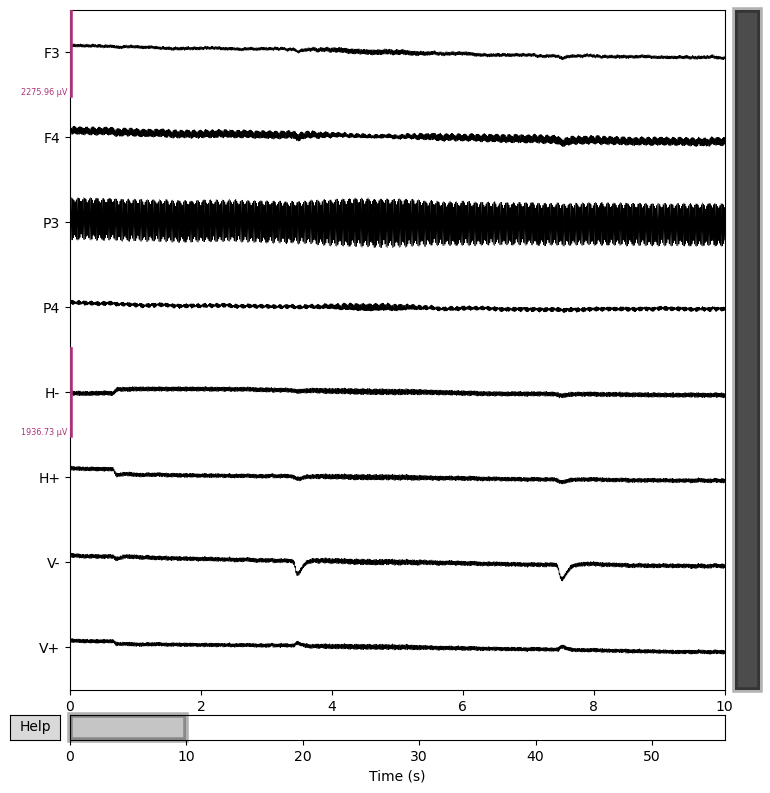

In [89]:
filenames = ["data/OpenBCISession_right_1/BrainFlow*.csv",
             "data/OpenBCISession_right_2/BrainFlow*.csv",
             "data/OpenBCISession_right_3/BrainFlow*.csv",
             "data/OpenBCISession_right_4/BrainFlow*.csv",
             "data/OpenBCISession_right_5/BrainFlow*.csv"]

raw_right = load_file_data(filenames)
raw_right.plot(n_channels=8, scalings='auto');

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


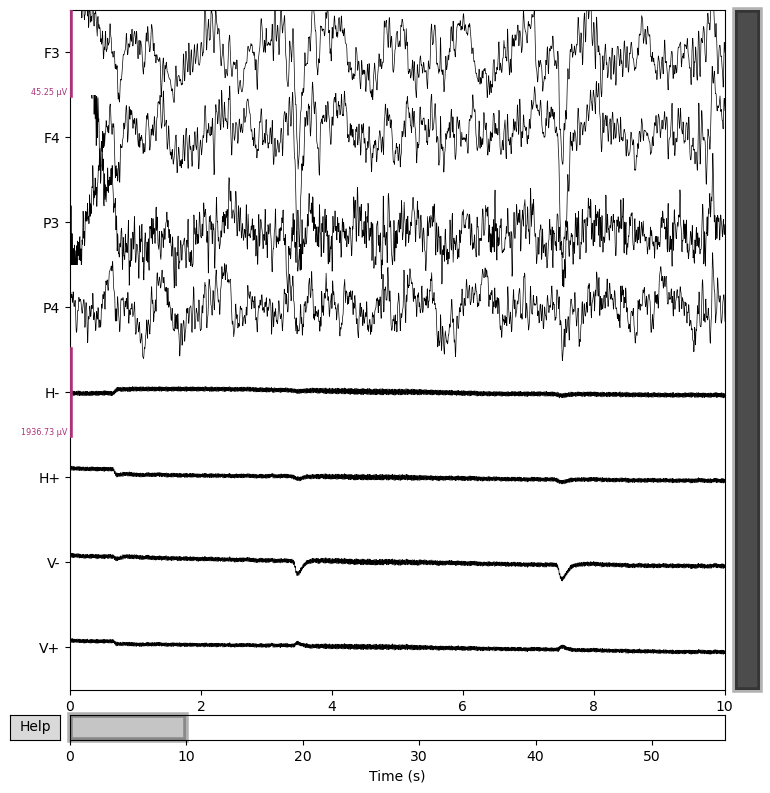

In [90]:
# Apply notch filter to remove 60Hz noise
filtered = filter_eeg_data(raw_right)
filtered.plot(n_channels=8, scalings='auto');

In [91]:
# Epoch data into 1 second windows
epochs = epoch_data(filtered, time_window=0.5, overlap=0)
print(epochs.get_data().shape)
print(epochs.get_data()[0].shape)

Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 112 events and 126 original time points ...
0 bad epochs dropped
(112, 8, 126)
(8, 126)


In [92]:
# Make new data frame with 4 channels of data
right_df = pd.DataFrame(epochs.get_data()[0].transpose(), columns=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])

# Drop last 4 columns
right_df = right_df.drop(columns=['ch1', 'ch2', 'ch3', 'ch4'])

# Add new columns with label = 1 for right
right_df['dir'] = 1

display(right_df)

,ch5,ch6,ch7,ch8,dir
0,-0.010631,-0.016494,0.000972,-0.017843,1
1,-0.010615,-0.016479,0.000993,-0.017826,1
2,-0.010681,-0.016536,0.000935,-0.017878,1
3,-0.010710,-0.016567,0.000905,-0.017910,1
4,-0.010640,-0.016501,0.000969,-0.017848,1
...,...,...,...,...,...
121,-0.010639,-0.016516,0.000944,-0.017861,1
122,-0.010621,-0.016499,0.000966,-0.017844,1
123,-0.010683,-0.016554,0.000912,-0.017894,1
124,-0.010711,-0.016578,0.000884,-0.017919,1


# Look Up Data Preparation

Creating RawArray with float64 data, n_channels=8, n_times=14106
    Range : 0 ... 14105 =      0.000 ...    56.420 secs
Ready.


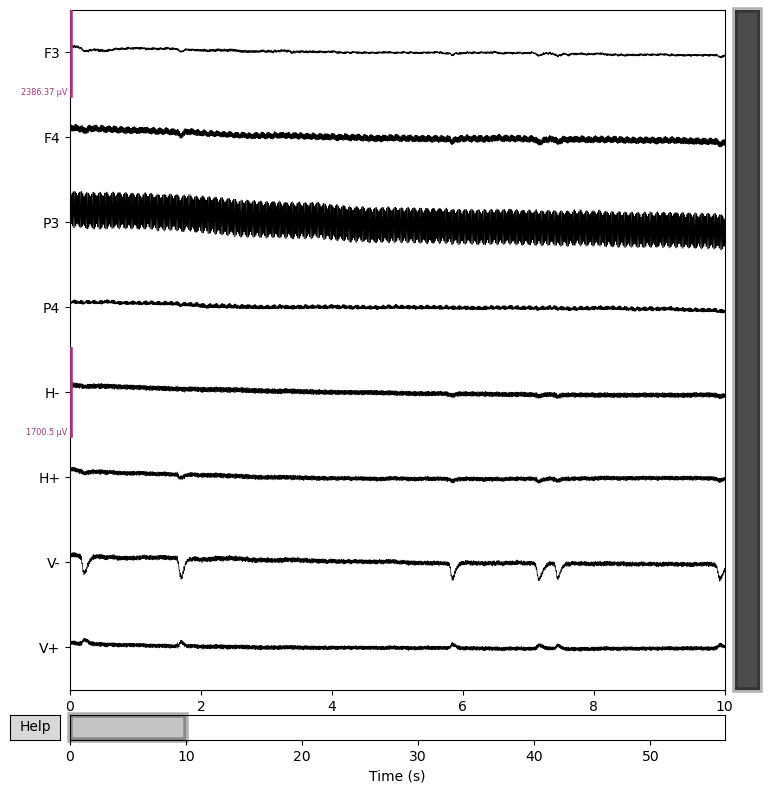

In [93]:
filenames = ["data/OpenBCISession_up_1/BrainFlow*.csv",
             "data/OpenBCISession_up_2/BrainFlow*.csv",
             "data/OpenBCISession_up_3/BrainFlow*.csv",
             "data/OpenBCISession_up_4/BrainFlow*.csv",
             "data/OpenBCISession_up_5/BrainFlow*.csv"]

raw_up = load_file_data(filenames)
raw_up.plot(n_channels=8, scalings='auto');

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


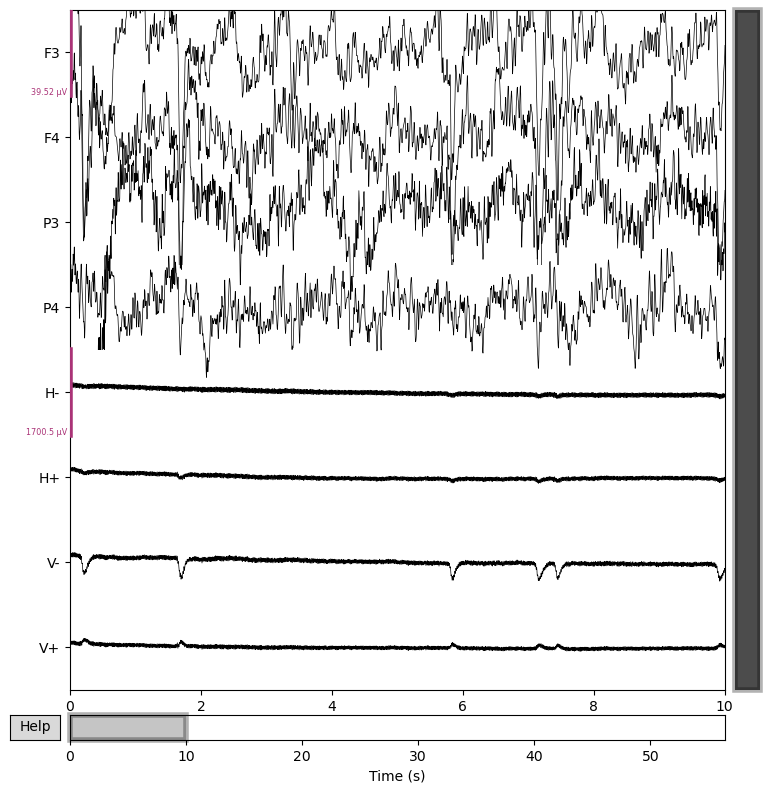

In [94]:
filtered = filter_eeg_data(raw_up)
filtered.plot(n_channels=8, scalings='auto');

In [95]:
epochs = epoch_data(filtered, time_window=0.5, overlap=0)
print(epochs.get_data().shape)
print(epochs.get_data()[0].shape)

Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 112 events and 126 original time points ...
0 bad epochs dropped
(112, 8, 126)
(8, 126)


In [96]:
up_df = pd.DataFrame(epochs.get_data()[0].transpose(), columns=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])

up_df = up_df.drop(columns=['ch1', 'ch2', 'ch3', 'ch4'])

up_df['dir'] = 2

display(up_df)

,ch5,ch6,ch7,ch8,dir
0,-0.012981,-0.018988,-0.001504,-0.020700,2
1,-0.012920,-0.018929,-0.001443,-0.020648,2
2,-0.012942,-0.018944,-0.001460,-0.020661,2
3,-0.013011,-0.019007,-0.001524,-0.020722,2
4,-0.012997,-0.019000,-0.001514,-0.020716,2
...,...,...,...,...,...
121,-0.013003,-0.019036,-0.001535,-0.020735,2
122,-0.012938,-0.018973,-0.001474,-0.020679,2
123,-0.012967,-0.018989,-0.001493,-0.020687,2
124,-0.013034,-0.019047,-0.001553,-0.020743,2


# Look Down Data Preparation

Creating RawArray with float64 data, n_channels=8, n_times=13768
    Range : 0 ... 13767 =      0.000 ...    55.068 secs
Ready.


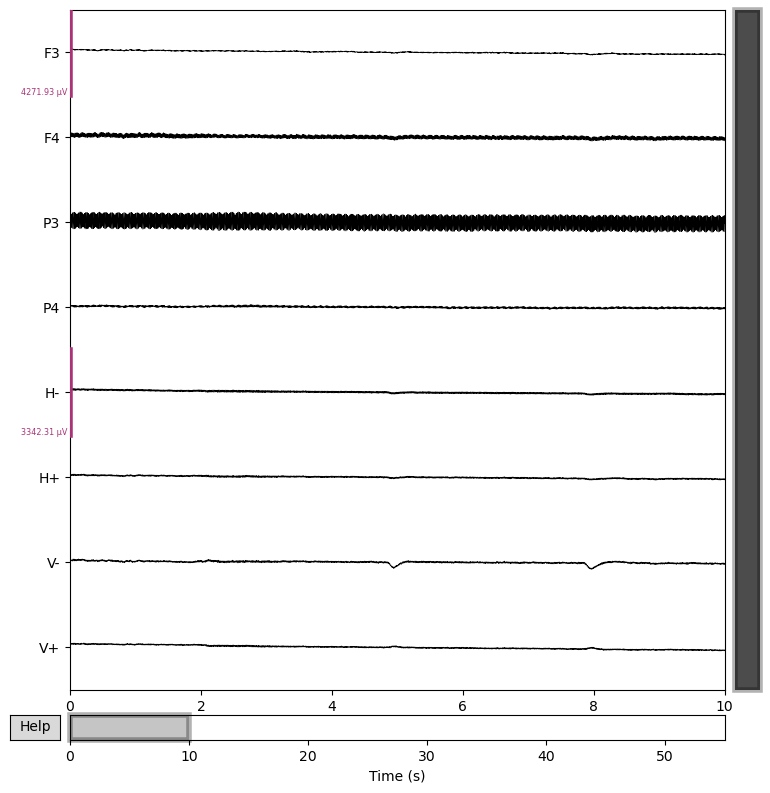

In [97]:
filenames = ["data/OpenBCISession_down_1/BrainFlow*.csv",
             "data/OpenBCISession_down_2/BrainFlow*.csv",
             "data/OpenBCISession_down_3/BrainFlow*.csv",
             "data/OpenBCISession_down_4/BrainFlow*.csv",
             "data/OpenBCISession_down_5/BrainFlow*.csv"]

raw_down = load_file_data(filenames)
raw_down.plot(n_channels=8, scalings='auto');

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


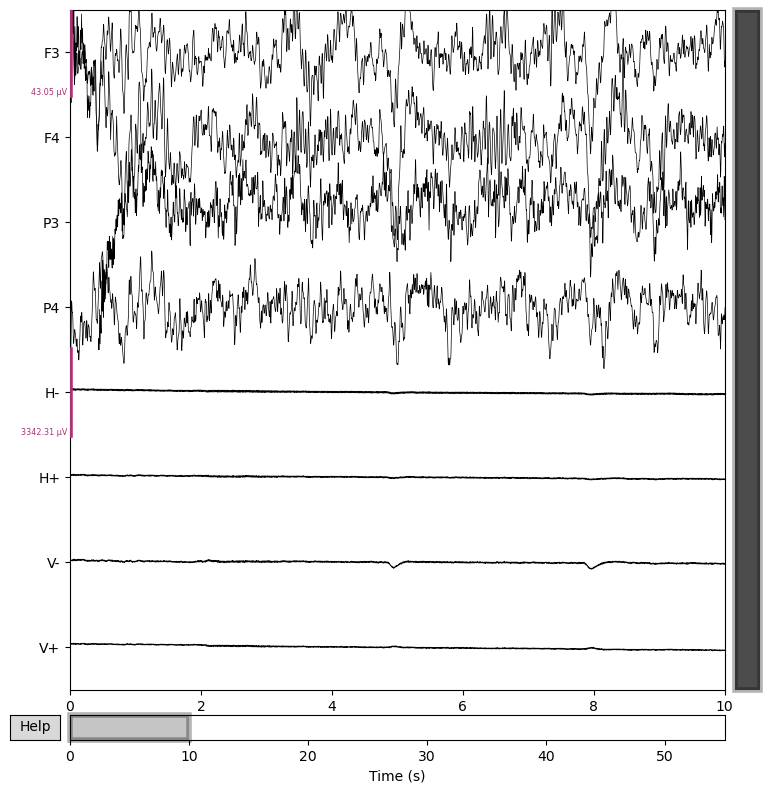

In [98]:
filtered = filter_eeg_data(raw_down)
filtered.plot(n_channels=8, scalings='auto');

In [99]:
epochs = epoch_data(filtered, time_window=0.5, overlap=0)
print(epochs.get_data().shape)
print(epochs.get_data()[0].shape)

Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 110 events and 126 original time points ...
0 bad epochs dropped
(110, 8, 126)
(8, 126)


In [100]:
down_df = pd.DataFrame(epochs.get_data()[0].transpose(), columns=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])

down_df = down_df.drop(columns=['ch1', 'ch2', 'ch3', 'ch4'])

down_df['dir'] = 3

display(down_df)

,ch5,ch6,ch7,ch8,dir
0,-0.015204,-0.021027,-0.003571,-0.022776,3
1,-0.015196,-0.021022,-0.003566,-0.022772,3
2,-0.015148,-0.020987,-0.003532,-0.022743,3
3,-0.015146,-0.020991,-0.003536,-0.022743,3
4,-0.015191,-0.021024,-0.003563,-0.022769,3
...,...,...,...,...,...
121,-0.015226,-0.021041,-0.003579,-0.022789,3
122,-0.015214,-0.021031,-0.003566,-0.022783,3
123,-0.015164,-0.020992,-0.003520,-0.022749,3
124,-0.015172,-0.020997,-0.003521,-0.022749,3


# Reject Data Preparation

Creating RawArray with float64 data, n_channels=8, n_times=2855
    Range : 0 ... 2854 =      0.000 ...    11.416 secs
Ready.


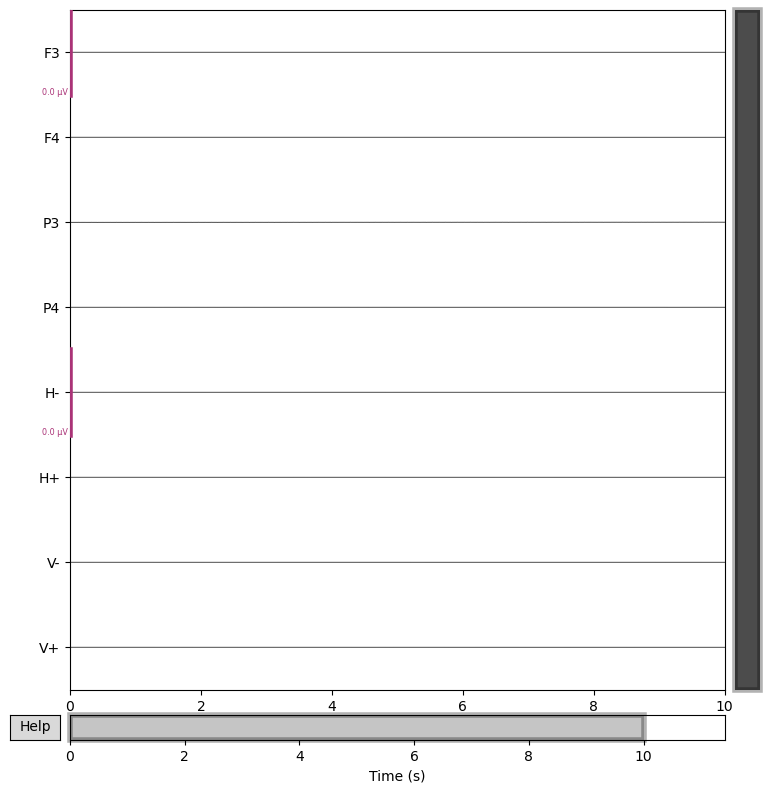

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


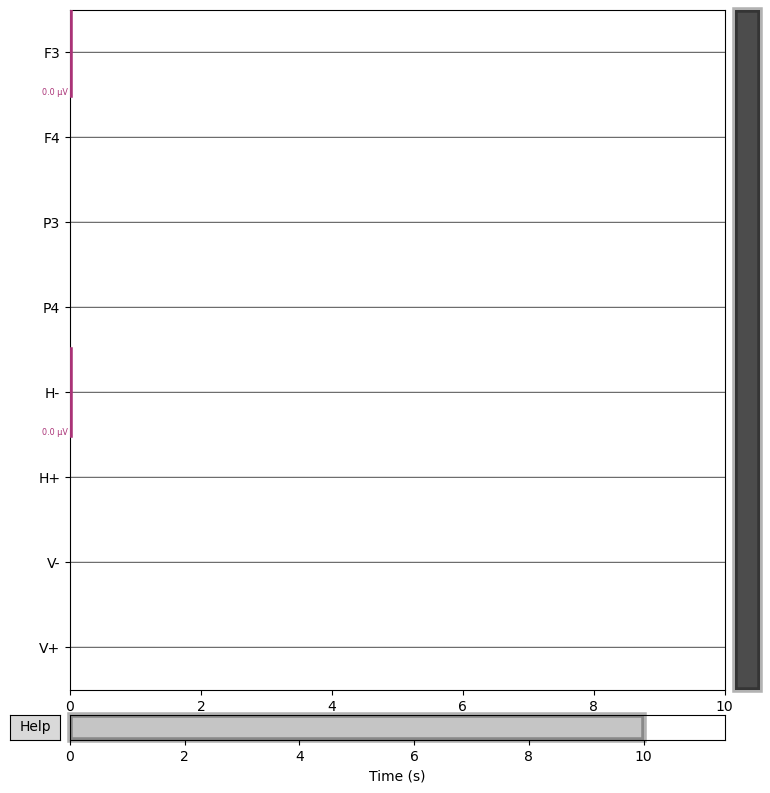

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 126 original time points ...
0 bad epochs dropped
(22, 8, 126)
(8, 126)


,ch5,ch6,ch7,ch8,dir
0,-0.017860,-0.023781,-0.006529,-0.025896,4
1,-0.017962,-0.023878,-0.006624,-0.025990,4
2,-0.017917,-0.023838,-0.006578,-0.025951,4
3,-0.017813,-0.023739,-0.006480,-0.025856,4
4,-0.017843,-0.023764,-0.006503,-0.025877,4
...,...,...,...,...,...
121,-0.017877,-0.023788,-0.006540,-0.025900,4
122,-0.017976,-0.023883,-0.006640,-0.025993,4
123,-0.017940,-0.023850,-0.006604,-0.025962,4
124,-0.017836,-0.023752,-0.006508,-0.025866,4


In [101]:
filenames = ["data/OpenBCISession_center/BrainFlow*.csv"]

# Read in raw data
raw_center = load_file_data(filenames)
raw_center.plot(n_channels=8, scalings='auto');

# Apply notch filter to remove 60Hz noise
filtered = filter_eeg_data(raw_center)
filtered.plot(n_channels=8, scalings='auto');

# Epoch data into 0.5 second windows
epochs = epoch_data(filtered, time_window=0.5, overlap=0)
print(epochs.get_data().shape)
print(epochs.get_data()[0].shape)

# Make new data frame with 8 channels of data
center_df = pd.DataFrame(epochs.get_data()[0].transpose(), columns=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])

# Drop first 4 columns
center_df = center_df.drop(columns=['ch1', 'ch2', 'ch3', 'ch4'])

# Add new column with label = 2 for center
center_df['dir'] = 4

display(center_df)


# Train Validation Test Split

In [102]:
from sklearn.model_selection import train_test_split

train_left, test_left = train_test_split(left_df, test_size=0.2, shuffle=False)
train_left, val_left = train_test_split(train_left, test_size=0.2, shuffle=False)

train_right, test_right = train_test_split(right_df, test_size=0.2, shuffle=False)
train_right, val_right = train_test_split(train_right, test_size=0.2, shuffle=False)

train_up, test_up = train_test_split(up_df, test_size=0.2, shuffle=False)
train_up, val_up = train_test_split(train_up, test_size=0.2, shuffle=False)

train_down, test_down = train_test_split(down_df, test_size=0.2, shuffle=False)
train_down, val_down = train_test_split(train_down, test_size=0.2, shuffle=False)

# Concatenate the focus and no focus dataframes
train_df = pd.concat([train_left, train_right, train_up, train_down])
val_df = pd.concat([val_left, val_right, val_up, val_down])
test_df = pd.concat([test_left, test_right, test_up, test_down])

display(train_df.shape)
display(val_df.shape)
display(test_df.shape)
display(train_df)
display(val_df)
display(test_df)

(320, 5)

(80, 5)

(104, 5)

,ch5,ch6,ch7,ch8,dir
0,-0.007460,-0.013580,0.004004,-0.014373,0
1,-0.007478,-0.013581,0.003993,-0.014362,0
2,-0.007507,-0.013607,0.003964,-0.014391,0
3,-0.007475,-0.013588,0.003986,-0.014377,0
4,-0.007457,-0.013578,0.004003,-0.014369,0
...,...,...,...,...,...
75,-0.015210,-0.021037,-0.003592,-0.022787,3
76,-0.015211,-0.021041,-0.003595,-0.022790,3
77,-0.015164,-0.020998,-0.003548,-0.022753,3
78,-0.015163,-0.020997,-0.003546,-0.022748,3


,ch5,ch6,ch7,ch8,dir
80,-0.007518,-0.013560,0.004070,-0.014389,0
81,-0.007559,-0.013595,0.004030,-0.014424,0
82,-0.007540,-0.013588,0.004044,-0.014425,0
83,-0.007513,-0.013572,0.004069,-0.014414,0
84,-0.007515,-0.013562,0.004076,-0.014396,0
...,...,...,...,...,...
95,-0.015172,-0.020994,-0.003555,-0.022745,3
96,-0.015217,-0.021034,-0.003593,-0.022777,3
97,-0.015210,-0.021028,-0.003586,-0.022776,3
98,-0.015165,-0.020989,-0.003547,-0.022744,3


,ch5,ch6,ch7,ch8,dir
100,-0.007459,-0.013522,0.004112,-0.014356,0
101,-0.007550,-0.013587,0.004043,-0.014415,0
102,-0.007586,-0.013623,0.004004,-0.014448,0
103,-0.007496,-0.013548,0.004081,-0.014372,0
104,-0.007438,-0.013507,0.004131,-0.014335,0
...,...,...,...,...,...
121,-0.015226,-0.021041,-0.003579,-0.022789,3
122,-0.015214,-0.021031,-0.003566,-0.022783,3
123,-0.015164,-0.020992,-0.003520,-0.022749,3
124,-0.015172,-0.020997,-0.003521,-0.022749,3


# Normalization

In [103]:
# Normalize all columns except the last
train_df.iloc[:, :-1] = (train_df.iloc[:, :-1] - train_df.iloc[:, :-1].mean()) / train_df.iloc[:, :-1].std()
val_df.iloc[:, :-1] = (val_df.iloc[:, :-1] - val_df.iloc[:, :-1].mean()) / val_df.iloc[:, :-1].std()
test_df.iloc[:, :-1] = (test_df.iloc[:, :-1] - test_df.iloc[:, :-1].mean()) / test_df.iloc[:, :-1].std()

display(train_df)
display(val_df)
display(test_df)

,ch5,ch6,ch7,ch8,dir
0,1.465886,1.407700,1.451669,1.432034,0
1,1.459623,1.407316,1.447750,1.435654,0
2,1.449262,1.397834,1.437163,1.426276,0
3,1.460540,1.404576,1.445025,1.430877,0
4,1.467025,1.408155,1.451302,1.433410,0
...,...,...,...,...,...
75,-1.276319,-1.257558,-1.255498,-1.224034,3
76,-1.276905,-1.259012,-1.256788,-1.224958,3
77,-1.260122,-1.243825,-1.240044,-1.213414,3
78,-1.259631,-1.243170,-1.239343,-1.211798,3


,ch5,ch6,ch7,ch8,dir
80,1.425187,1.417980,1.429520,1.439334,0
81,1.410949,1.405708,1.415588,1.428361,0
82,1.417705,1.408006,1.420591,1.428120,0
83,1.427142,1.413847,1.429450,1.431375,0
84,1.426454,1.417182,1.431612,1.437176,0
...,...,...,...,...,...
95,-1.252163,-1.236041,-1.233100,-1.205230,3
96,-1.267895,-1.250261,-1.246361,-1.215474,3
97,-1.265541,-1.248186,-1.243941,-1.215247,3
98,-1.249544,-1.234031,-1.230150,-1.204947,3


,ch5,ch6,ch7,ch8,dir
100,1.441514,1.436602,1.446181,1.451874,0
101,1.409478,1.413186,1.422009,1.433331,0
102,1.397084,1.400458,1.408120,1.422998,0
103,1.428441,1.427280,1.435288,1.446835,0
104,1.448589,1.441902,1.452703,1.458789,0
...,...,...,...,...,...
121,-1.269264,-1.252884,-1.244706,-1.218389,3
122,-1.265005,-1.249191,-1.240210,-1.216245,3
123,-1.247595,-1.235352,-1.224264,-1.205465,3
124,-1.250208,-1.237175,-1.224639,-1.205685,3


# Train and Test Models

Train epoch 1/5 loss: 2.1988


100%|██████████| 4/4 [00:02<00:00,  1.69it/s]


Test loss: 0.0483
Validation accuracy: 49.04%


Train epoch 2/5 loss: 1.7629


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


Test loss: 0.0442
Validation accuracy: 49.04%


Train epoch 3/5 loss: 1.5639


100%|██████████| 4/4 [00:00<00:00, 18.75it/s]


Test loss: 0.0447
Validation accuracy: 49.04%


Train epoch 4/5 loss: 1.4610


100%|██████████| 4/4 [00:00<00:00, 38.50it/s]


Test loss: 0.0430
Validation accuracy: 49.04%


Train epoch 5/5 loss: 1.4325


100%|██████████| 4/4 [00:00<00:00, 42.45it/s]

Test loss: 0.0443
Validation accuracy: 50.00%


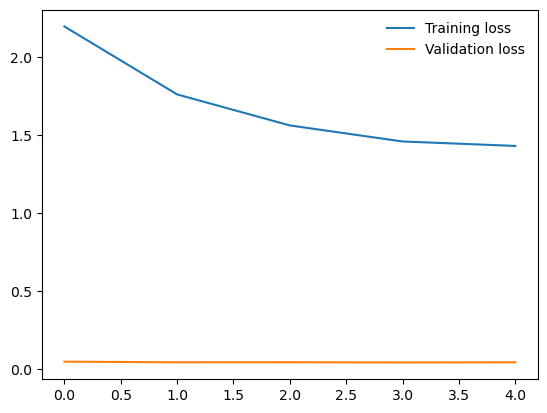

In [104]:
from snn import SNN, SpikingModel, train_model, test_model
from norse.torch import SpikeLatencyLIFEncoder
from norse.torch.module import LIFParameters

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32

model = SpikingModel(
    snn=SNN(num_inputs=4, num_hidden=100, num_outputs=4, dt=0.01),
    encoder=SpikeLatencyLIFEncoder(seq_length=batch_size),
    decode_last=False
)

loss_fn = torch.nn.functional.nll_loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.01, patience=1, verbose=False)

train_dataset = EEGDataset(train_df, -1)
test_dataset = EEGDataset(test_df, -1)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
model, train_losses, val_losses = train_model(model, device, optimizer, scheduler, loss_fn, 5, train_loader, test_loader)

# Plot losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

Train epoch 1/5 loss: 0.6846


100%|██████████| 3/3 [00:00<00:00, 1866.62it/s]


Test loss: 0.0117
Validation accuracy: 100.00%


Train epoch 2/5 loss: 0.4378


100%|██████████| 3/3 [00:00<00:00, 1718.98it/s]


Test loss: 0.0036
Validation accuracy: 100.00%


Train epoch 3/5 loss: 0.3106


100%|██████████| 3/3 [00:00<00:00, 1658.48it/s]


Test loss: 0.0010
Validation accuracy: 100.00%


Train epoch 4/5 loss: 0.2378


100%|██████████| 3/3 [00:00<00:00, 719.81it/s]


Test loss: 0.0004
Validation accuracy: 100.00%


Train epoch 5/5 loss: 0.1920


100%|██████████| 3/3 [00:00<00:00, 1452.82it/s]


Test loss: 0.0002
Validation accuracy: 100.00%

Testing model...


100%|██████████| 4/4 [00:00<00:00, 2114.06it/s]


Test loss: 0.0002
Validation accuracy: 100.00%


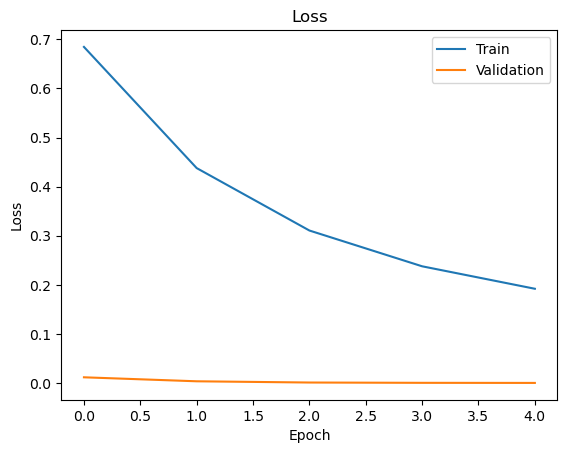

In [105]:
from mlp import MLP, train_model, test_model

train_dataset = EEGDataset(train_df, -1)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = EEGDataset(val_df, -1)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = EEGDataset(test_df, -1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

model = MLP(num_inputs=4, num_hidden=200, num_outputs=4)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.01, patience=1, verbose=False)
loss_fn = torch.nn.CrossEntropyLoss()

model, train_losses, val_losses = train_model(model, device, optimizer, scheduler, loss_fn, 5, train_loader, val_loader)

print("\nTesting model...")
test_model(model, device, loss_fn, test_loader)

# Plot loss
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

# save model
torch.save(model.state_dict(), 'eog_model.pt')
torch.save(model.state_dict(), 'eog_model_new.pt')

In [106]:
# get confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def get_confusion_matrix(model, test_loader):
    y_pred = []
    y_true = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            y_pred.extend(output.argmax(dim=1).tolist())
            y_true.extend(target.tolist())
    return confusion_matrix(y_true, y_pred)

cm = get_confusion_matrix(model, test_loader)
print(cm)

[[26  0  0  0]
 [ 0 26  0  0]
 [ 0  0 26  0]
 [ 0  0  0 26]]


In [107]:
new_data = np.array([[-0.017817, -0.023734, -0.006484, -0.025846]])
new_data = np.array([[-0.017976, -0.023883, -0.006640, -0.025993]])
# new_data = np.array([[1.019086, 1.030786, 1.020511, 1.017784]])
new_data = torch.from_numpy(new_data).float()
new_data = new_data.to(device)

model.eval()
with torch.no_grad():
    output = model(new_data)
    print(torch.nn.functional.softmax(output, dim=1))

tensor([[0.0006, 0.5773, 0.4214, 0.0007]])


In [108]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

train_data = train_df.iloc[:, :-1].to_numpy()
train_labels = train_df.iloc[:, -1].to_numpy()
test_data = test_df.iloc[:, :-1].to_numpy()
test_labels = test_df.iloc[:, -1].to_numpy()

clf = xgb.XGBClassifier(n_estimators=10, max_depth=2, probability=True)
clf.fit(train_data, train_labels)

test_predictions = clf.predict(test_data)
print(test_predictions)

# get accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(accuracy)
# clf.save_model('xgb_model.json')

[09:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035139432/work/src/learner.cc:767: 
Parameters: { "probability" } are not used.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
1.0


In [109]:
# Reject class 
new_data = np.array([[-0.017817, -0.023734, -0.006484, -0.025846]])
# new_data = np.array([[1.019086, 1.030786, 1.020511, 1.017784]])
test_prob = clf.predict_proba(new_data)
print(test_prob)

[[0.01675166 0.94930094 0.01719573 0.01675166]]


In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', probability=True)
clf.fit(train_data, train_labels)

test_predictions = clf.predict(test_data)
print(test_predictions)

accuracy = accuracy_score(test_labels, test_predictions)
print(accuracy)

# # save svc model
# import pickle
# pickle.dump(clf, open('svc_model.pkl', 'wb'))
# pickle.dump(clf, open('svc_model_new.pkl', 'wb'))

# # save training data along with labels in pickle format
# pickle.dump(train_data, open('train_data.pkl', 'wb'))
# pickle.dump(train_labels, open('train_labels.pkl', 'wb'))
# pickle.dump(train_data, open('train_data_new.pkl', 'wb'))
# pickle.dump(train_labels, open('train_labels_new.pkl', 'wb'))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
1.0


In [111]:
# Reject class
new_data = np.array([[-0.017817, -0.023734, -0.006484, -0.025846]])
new_data = np.array([[-0.017976, -0.023883, -0.006640, -0.025993]])
# new_data = np.array([[1.019086, 1.030786, 1.020511, 1.017784]])
test_prob = clf.predict_proba(new_data)
print(test_prob)

[[0.0188463  0.64693137 0.30600807 0.02821426]]
